In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# path names
root = Path().resolve()
path = root/'dataset'/'Henry_Mpro_pKa'

In [3]:
# the function to read data
def read_data(name):
    table_data = pd.DataFrame({})
    dataset_path = path/name
    for dp in dataset_path.iterdir():
        # structure.pdb does not need to be read here
        if dp.name != 'structure.pdb':
            temp_table = pd.read_table(dp, header=None, names=['#1', '#2'])
            temp_array = (list)(temp_table['#2'])
            table_data[dp.name] = temp_array
            warnings.simplefilter(action="ignore", category=pd.errors.PerformanceWarning)
    return table_data

In [4]:
S02_table = read_data(name='S02')
S03_table = read_data(name='S03')
S04_table = read_data(name='S04')
S05_table = read_data(name='S05')
S06_table = read_data(name='S06')
S07_table = read_data(name='S07')
S08_table = read_data(name='S08')
S09_table = read_data(name='S09')
S10_table = read_data(name='S10')
S11_table = read_data(name='S11')
p12_table = read_data(name='p12')
p13_table = read_data(name='p13')

In [5]:
S02_table.head()

,LYS_137,GLU_288,LYS_367,GLU_320,GLU_290,LYS_394,LYS_318,ASP_33,ASP_56,CYS_16,...,ASP_340,LYS_443,TYR_37,ARG_411,ASP_398,ASP_216,ASP_482,ASP_92,ASP_535,TYR_239
0,10.10,3.35,10.89,5.64,0.91,10.12,10.93,3.63,4.05,11.84,...,2.67,9.93,11.18,12.89,2.83,4.02,3.52,3.19,3.76,10.93
1,10.44,4.02,10.46,5.08,0.53,9.94,11.11,3.46,3.92,11.64,...,3.68,9.79,10.34,13.08,2.17,3.97,3.58,2.38,2.22,11.00
2,10.20,4.70,10.60,5.54,1.12,10.05,10.41,3.47,3.96,11.19,...,2.59,9.06,11.39,12.98,2.46,4.16,3.29,2.22,2.75,11.20
3,9.99,4.91,10.61,5.69,1.23,10.10,11.25,3.43,2.98,11.55,...,2.93,10.16,11.60,12.83,3.12,4.21,3.33,2.57,2.27,11.16
4,10.05,4.72,10.21,5.90,1.19,9.95,11.22,3.68,3.04,11.44,...,2.47,10.61,12.00,13.31,3.00,4.11,3.64,2.13,2.20,11.24


In [6]:
# the function to perform pearson correlation analysis
def get_high_corr_features(table):
    corr_matrix = table.corr(method='pearson')
    threshold = 0.8

    corr_pairs = corr_matrix.stack().reset_index()
    corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']
    corr_features = corr_pairs[
        (corr_pairs['Correlation'].abs() > threshold) &
        (corr_pairs['Feature1'] != corr_pairs['Feature2'])
    ].sort_values(by='Correlation', ascending=False).drop_duplicates(subset=['Correlation'])

    feature_1_array = (list)(corr_features['Feature1'])
    feature_2_array = (list)(corr_features['Feature2'])

    high_features_array = list(set(feature_1_array + feature_2_array))

    return corr_matrix, corr_features, high_features_array

In [7]:
S02_corr_matrix, S02_corr_features, S02_high_features_array = get_high_corr_features(S02_table)
S03_corr_matrix, S03_corr_features, S03_high_features_array = get_high_corr_features(S03_table)
S04_corr_matrix, S04_corr_features, S04_high_features_array = get_high_corr_features(S04_table)
S05_corr_matrix, S05_corr_features, S05_high_features_array = get_high_corr_features(S05_table)
S06_corr_matrix, S06_corr_features, S06_high_features_array = get_high_corr_features(S06_table)
S07_corr_matrix, S07_corr_features, S07_high_features_array = get_high_corr_features(S07_table)
S08_corr_matrix, S08_corr_features, S08_high_features_array = get_high_corr_features(S08_table)
S09_corr_matrix, S09_corr_features, S09_high_features_array = get_high_corr_features(S09_table)
S10_corr_matrix, S10_corr_features, S10_high_features_array = get_high_corr_features(S10_table)
S11_corr_matrix, S11_corr_features, S11_high_features_array = get_high_corr_features(S11_table)
p12_corr_matrix, p12_corr_features, p12_high_features_array = get_high_corr_features(p12_table)
p13_corr_matrix, p13_corr_features, p13_high_features_array = get_high_corr_features(p13_table)

In [8]:
print(S02_corr_features)
print(S02_high_features_array)

      Feature1 Feature2  Correlation
15434  GLU_472  HIS_478    -0.857389
16024  LYS_102  ASP_153    -0.863689
6274    ASP_34   LYS_90    -0.931149
18950  LYS_396  ASP_340    -0.931516
['ASP_340', 'GLU_472', 'ASP_34', 'ASP_153', 'HIS_478', 'LYS_90', 'LYS_396', 'LYS_102']


In [9]:
# compute high-correlation matrix
def compute_hc_matrix(data_table, high_features_array):

    high_corr_df = data_table[high_features_array]
    high_corr_matrix = high_corr_df.corr(method='pearson')

    return high_corr_df, high_corr_matrix

In [10]:
S02_hc_df, S02_hc_matrix = compute_hc_matrix(S02_table, S02_high_features_array)
S03_hc_df, S03_hc_matrix = compute_hc_matrix(S03_table, S03_high_features_array)
S04_hc_df, S04_hc_matrix = compute_hc_matrix(S04_table, S04_high_features_array)
S05_hc_df, S05_hc_matrix = compute_hc_matrix(S05_table, S05_high_features_array)
S06_hc_df, S06_hc_matrix = compute_hc_matrix(S06_table, S06_high_features_array)
S07_hc_df, S07_hc_matrix = compute_hc_matrix(S07_table, S07_high_features_array)
S08_hc_df, S08_hc_matrix = compute_hc_matrix(S08_table, S08_high_features_array)
S09_hc_df, S09_hc_matrix = compute_hc_matrix(S09_table, S09_high_features_array)
S10_hc_df, S10_hc_matrix = compute_hc_matrix(S10_table, S10_high_features_array)
S11_hc_df, S11_hc_matrix = compute_hc_matrix(S11_table, S11_high_features_array)
p12_hc_df, p12_hc_matrix = compute_hc_matrix(p12_table, p12_high_features_array)
p13_hc_df, p13_hc_matrix = compute_hc_matrix(p13_table, p13_high_features_array)

In [11]:
print(S02_hc_df)
print(S02_hc_matrix)

     ASP_340  GLU_472  ASP_34  ASP_153  HIS_478  LYS_90  LYS_396  LYS_102
0       2.67     1.41    2.70     4.02     5.48   11.43    11.35    10.83
1       3.68     3.71    2.65     2.95     3.83   11.37    10.70    11.72
2       2.59     2.36    2.69     3.92     6.00   11.52    11.37    10.67
3       2.93     4.82    3.71     4.01     3.59   10.60    11.29    10.63
4       2.47     2.45    3.46     3.89     4.75   10.65    11.42    10.56
..       ...      ...     ...      ...      ...     ...      ...      ...
596     2.82     2.80    3.96     4.02     5.65   10.40    11.43    10.61
597     2.88     2.97    2.57     2.84     5.36   11.32    11.35    11.58
598     3.97     2.28    2.91     3.97     5.24   11.39    10.55    10.69
599     3.59     2.48    3.22     4.05     5.28   10.83    10.63    10.72
600     2.69     2.77    2.94     3.96     5.62   11.38    11.41    10.60

[601 rows x 8 columns]
          ASP_340   GLU_472    ASP_34   ASP_153   HIS_478    LYS_90   LYS_396  \
ASP_340

In [12]:
def visualize_matrix(name, high_corr_matrix):

    figure_path = './figure/' + name + '_matrix.png'
    title = name + ' Pearson Correlation Matrix Heatmap'

    # visualize the matrix using the heatmap
    plt.figure(figsize=(12, 10))
    # cover upper part
    mask = np.triu(np.ones_like(high_corr_matrix, dtype=bool))
    labels = high_corr_matrix.map(lambda v: v if v else '')
    heatmap = sns.heatmap(high_corr_matrix, mask=mask, annot=labels, fmt='.2f',
                          cmap='coolwarm_r', center=0, square=True, linewidths=.5,
                          cbar_kws={"shrink": .8})

    plt.title(title, fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(figure_path)
    plt.show()

    return None

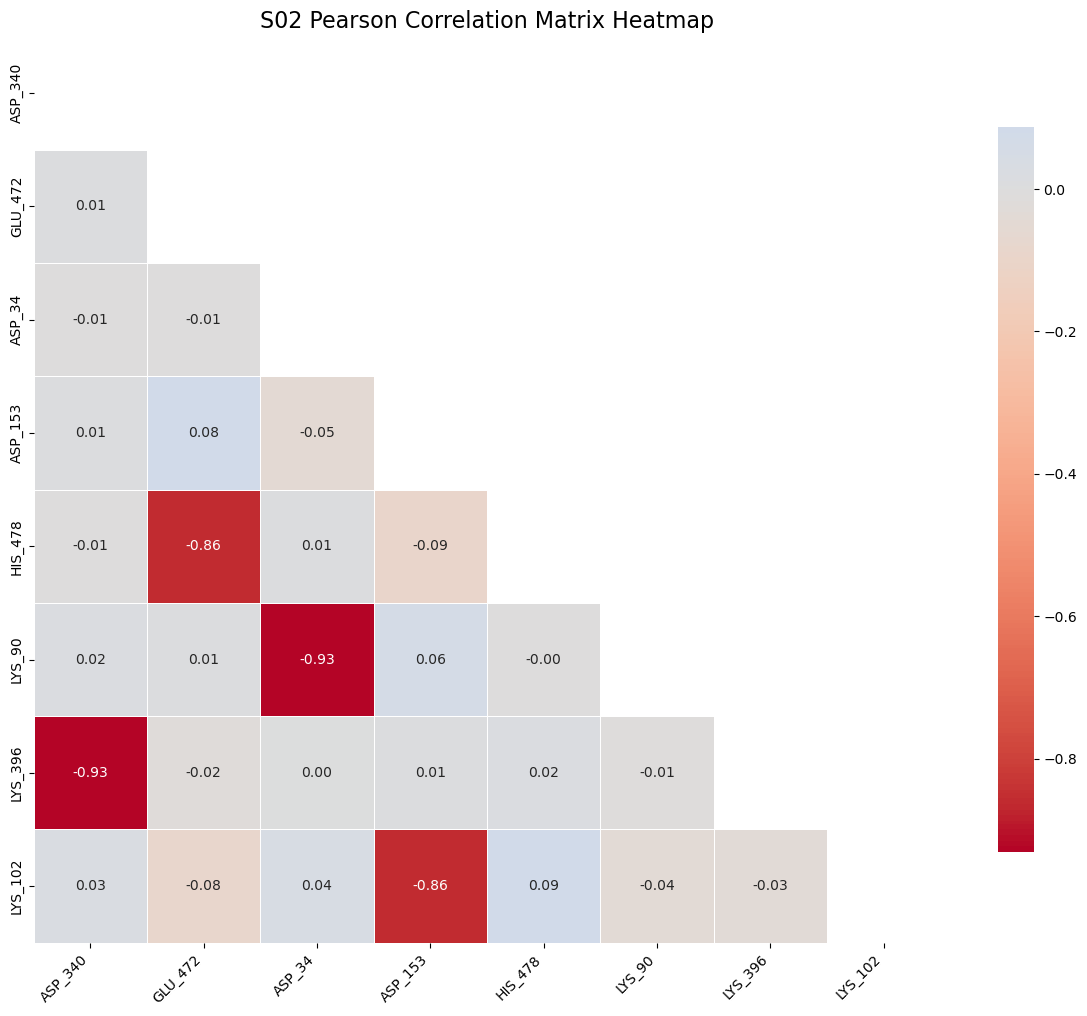

In [13]:
visualize_matrix('S02', S02_hc_matrix)

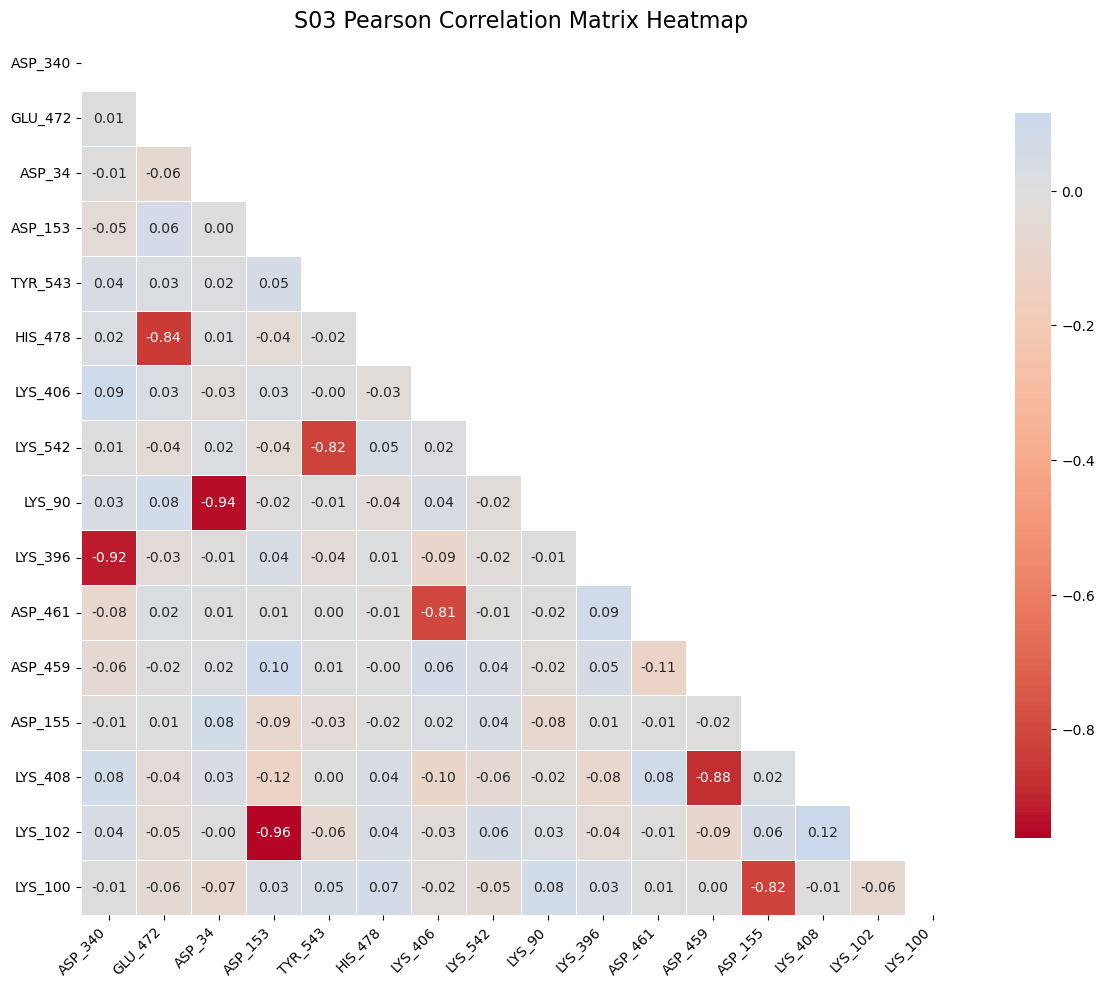

In [14]:
visualize_matrix('S03', S03_hc_matrix)

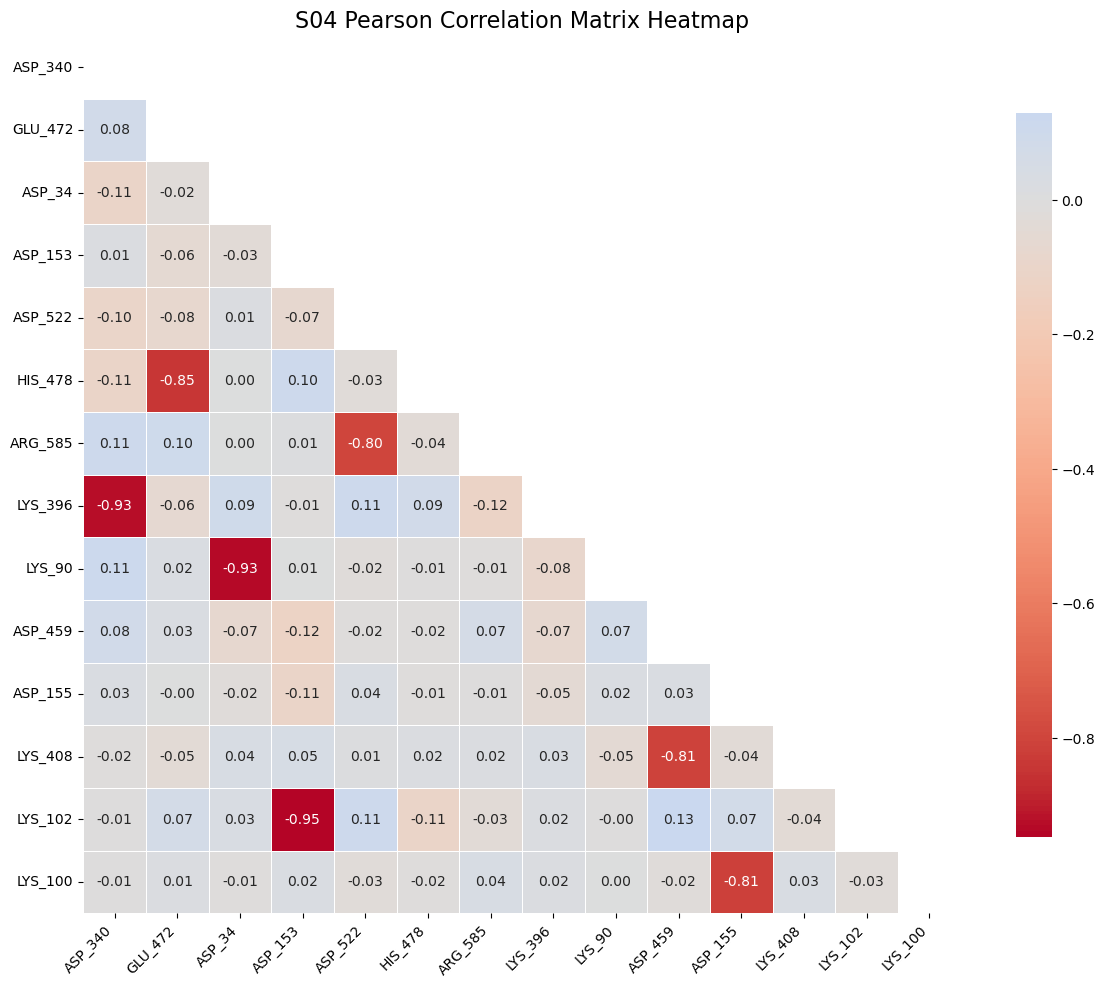

In [15]:
visualize_matrix('S04', S04_hc_matrix)

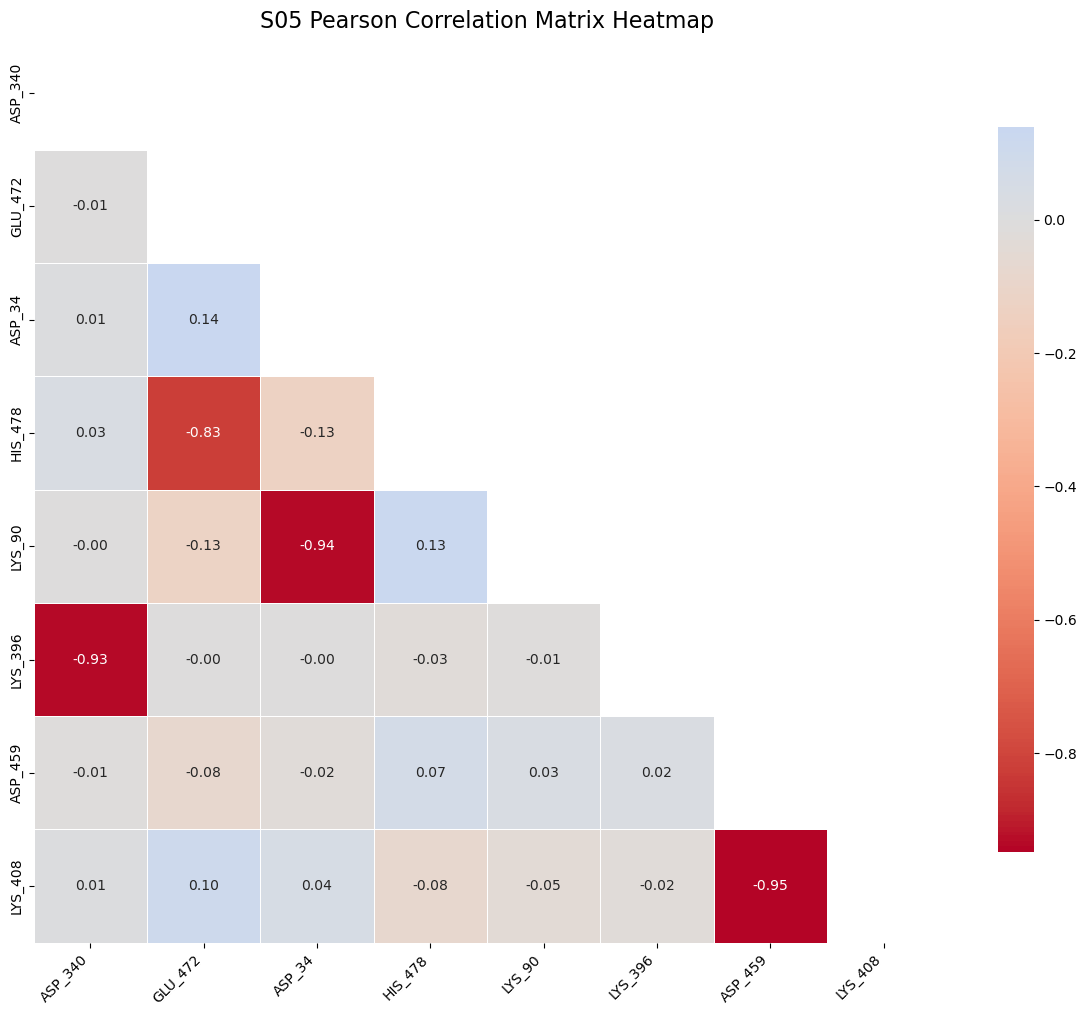

In [16]:
visualize_matrix('S05', S05_hc_matrix)

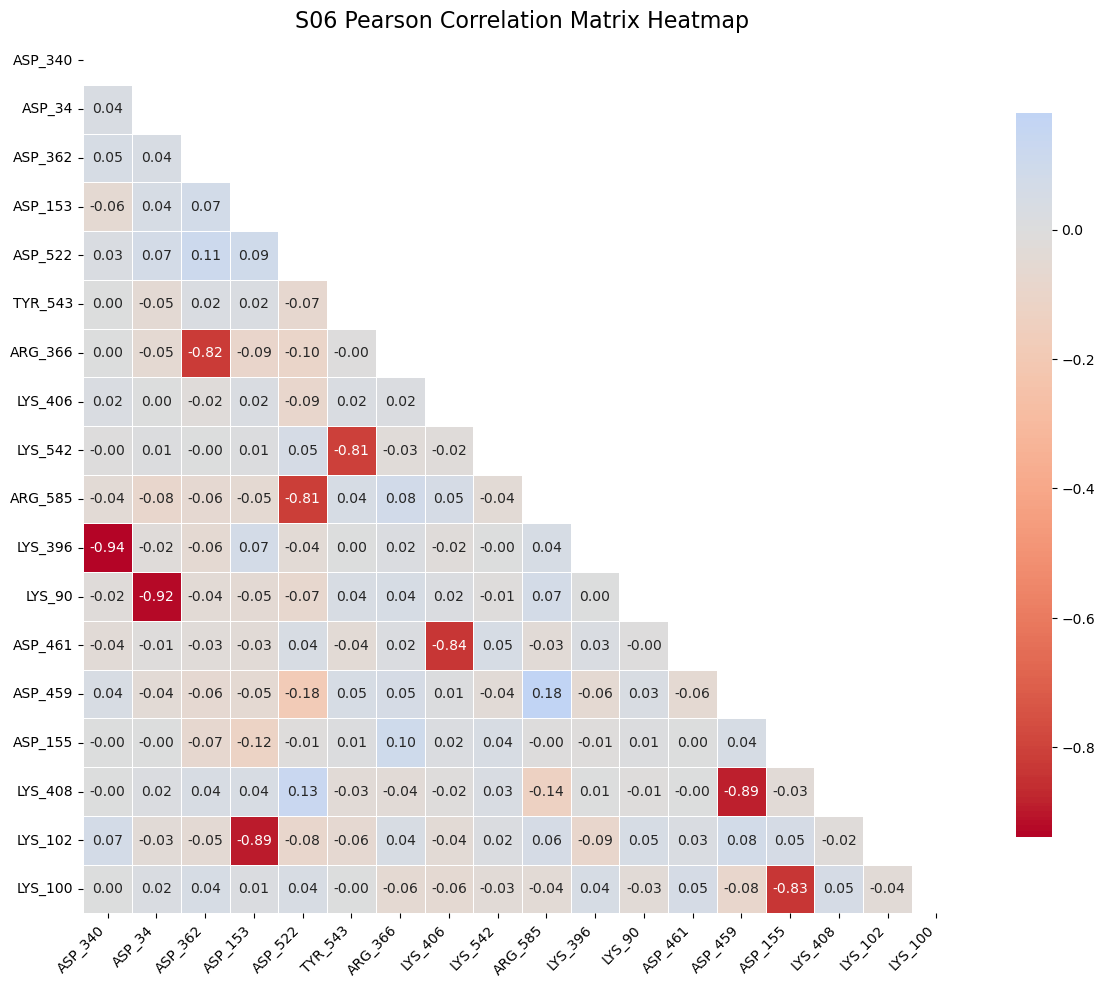

In [17]:
visualize_matrix('S06', S06_hc_matrix)

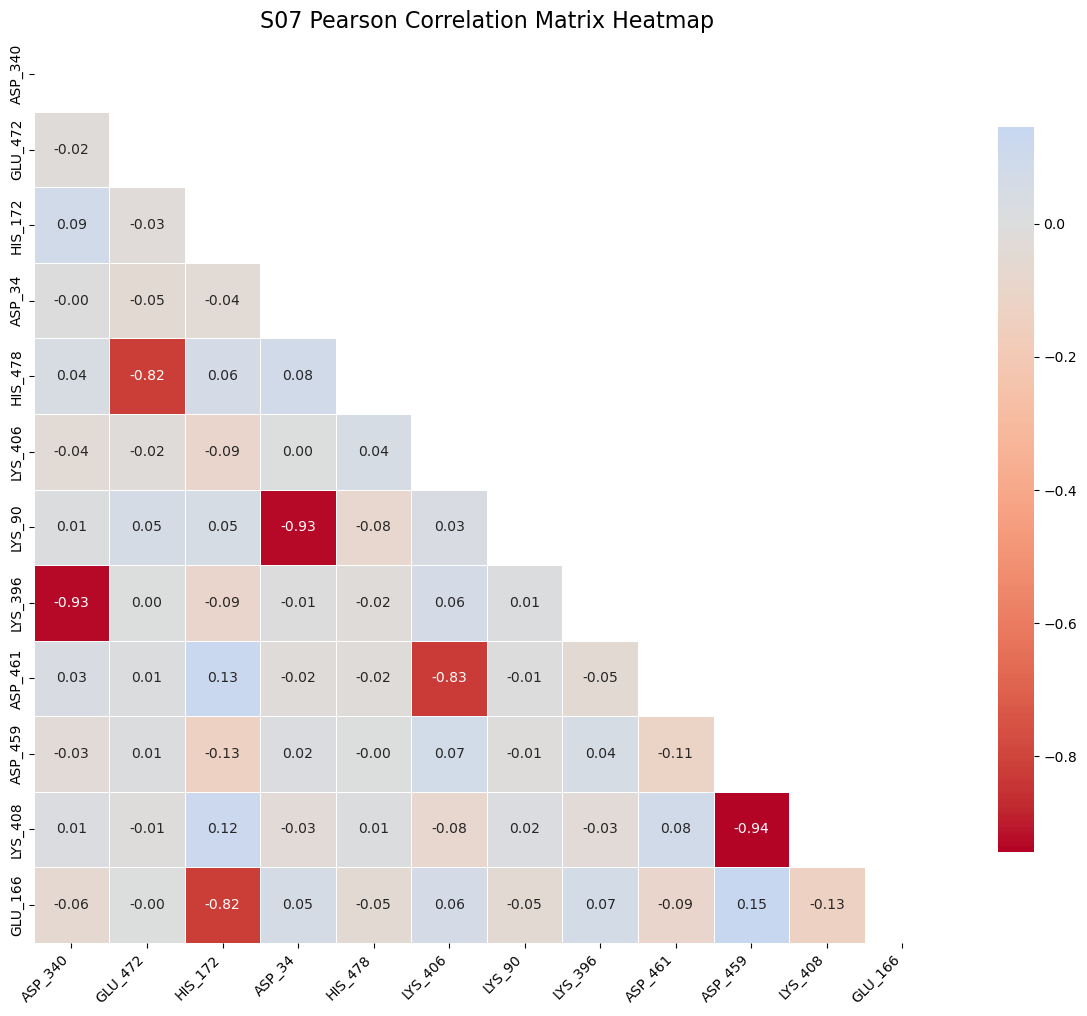

In [18]:
visualize_matrix('S07', S07_hc_matrix)

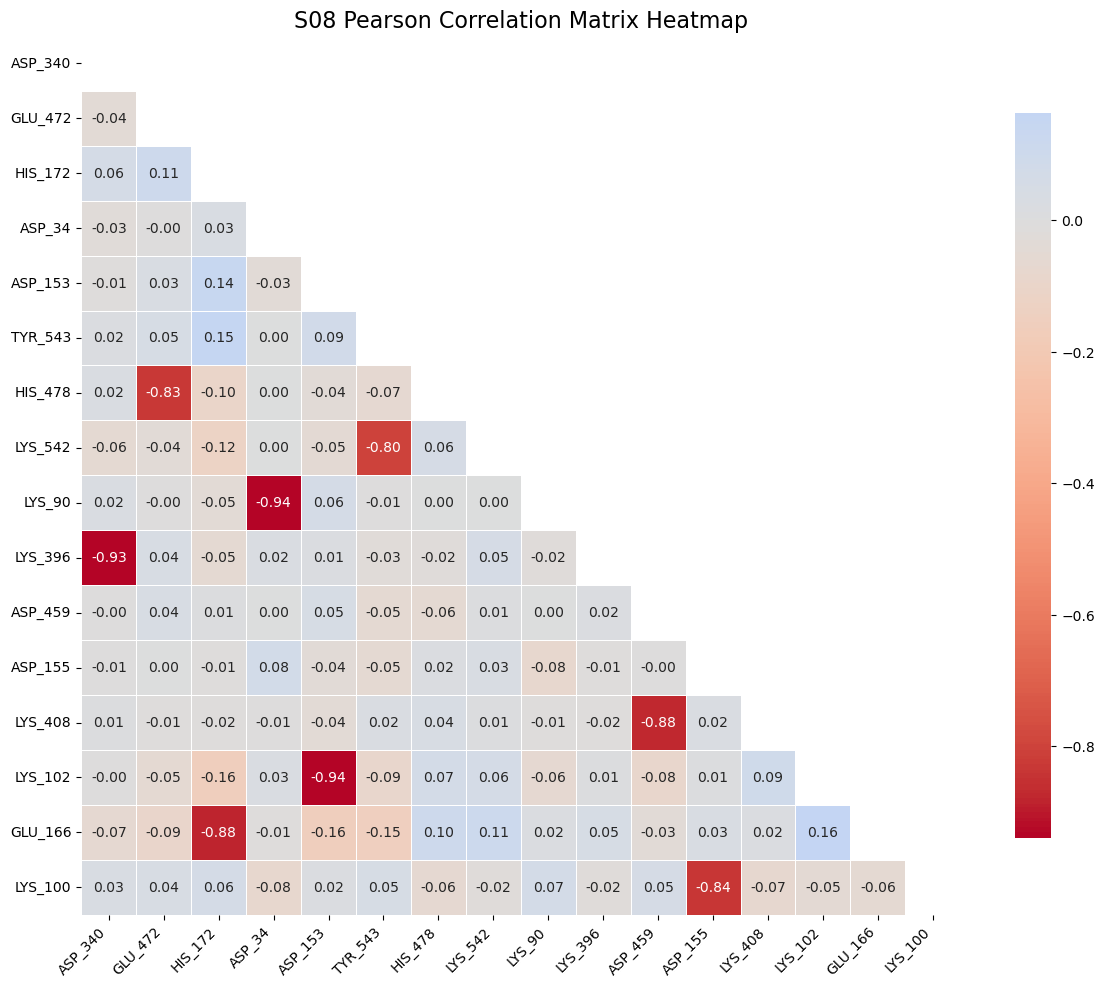

In [19]:
visualize_matrix('S08', S08_hc_matrix)

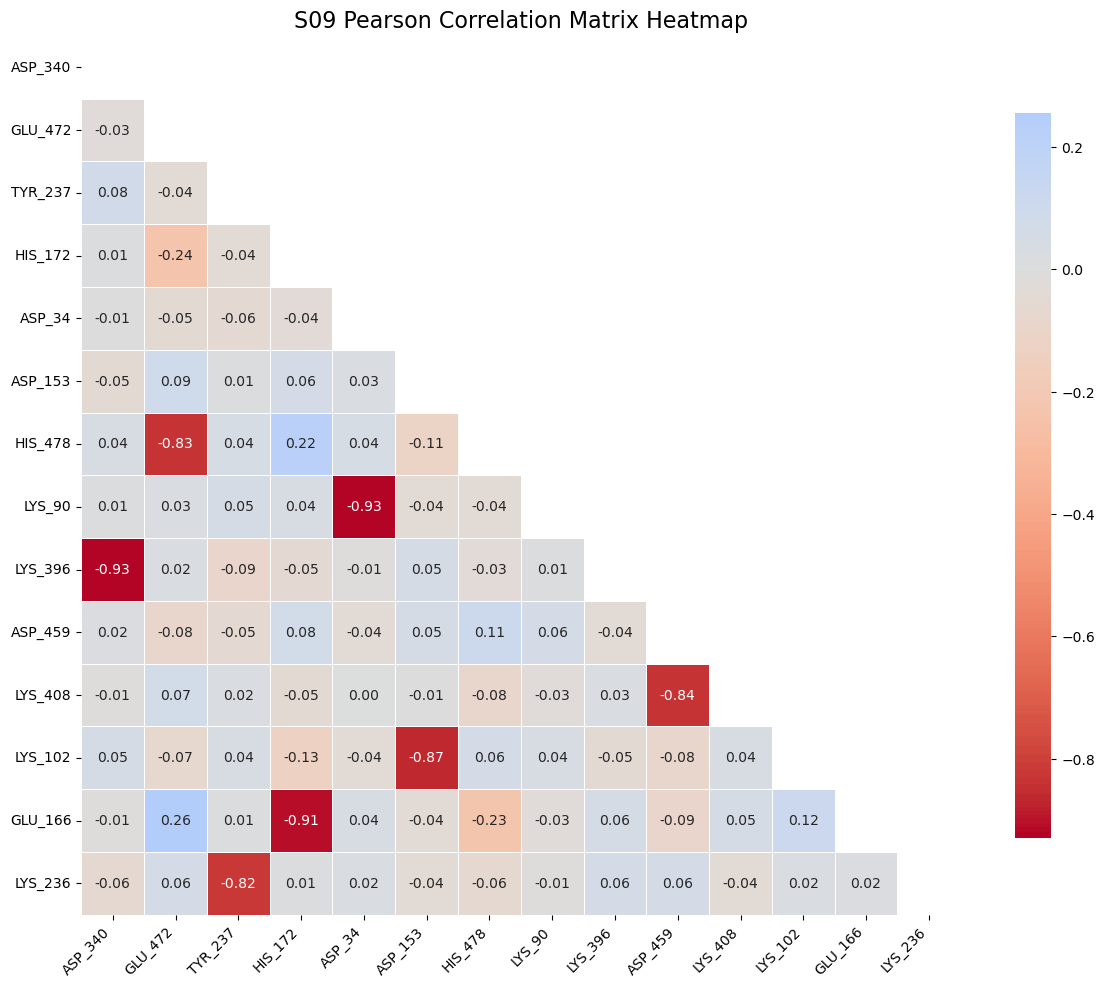

In [20]:
visualize_matrix('S09', S09_hc_matrix)

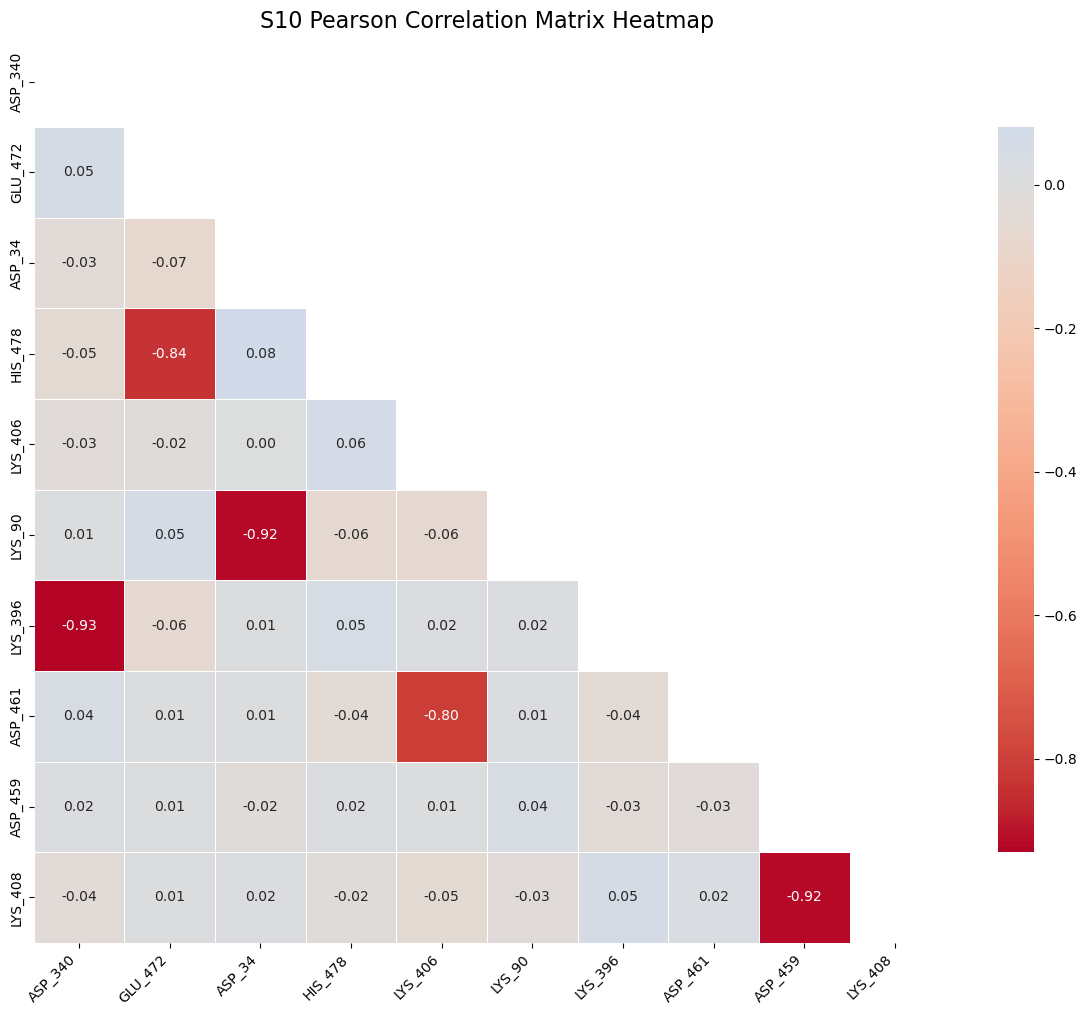

In [21]:
visualize_matrix('S10', S10_hc_matrix)

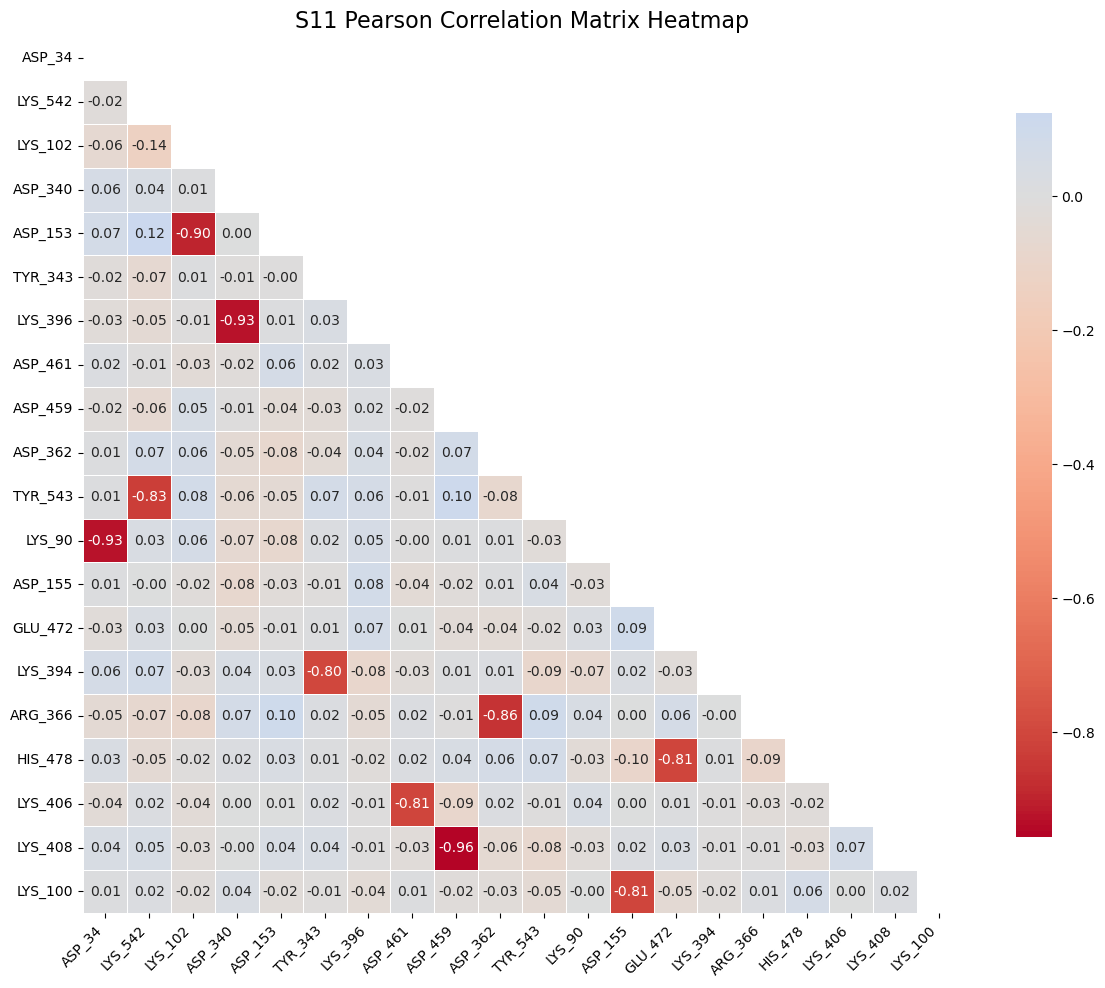

In [22]:
visualize_matrix('S11', S11_hc_matrix)

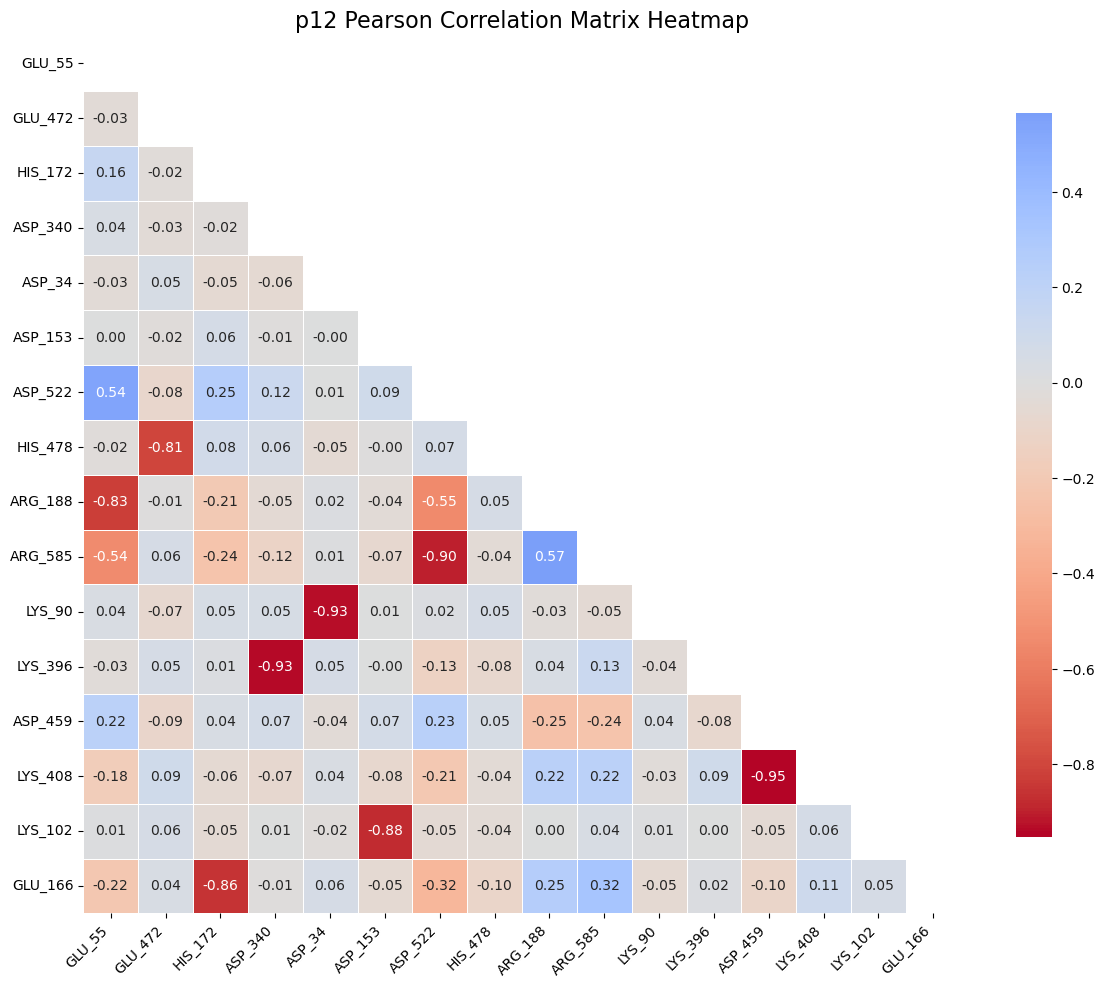

In [23]:
visualize_matrix('p12', p12_hc_matrix)

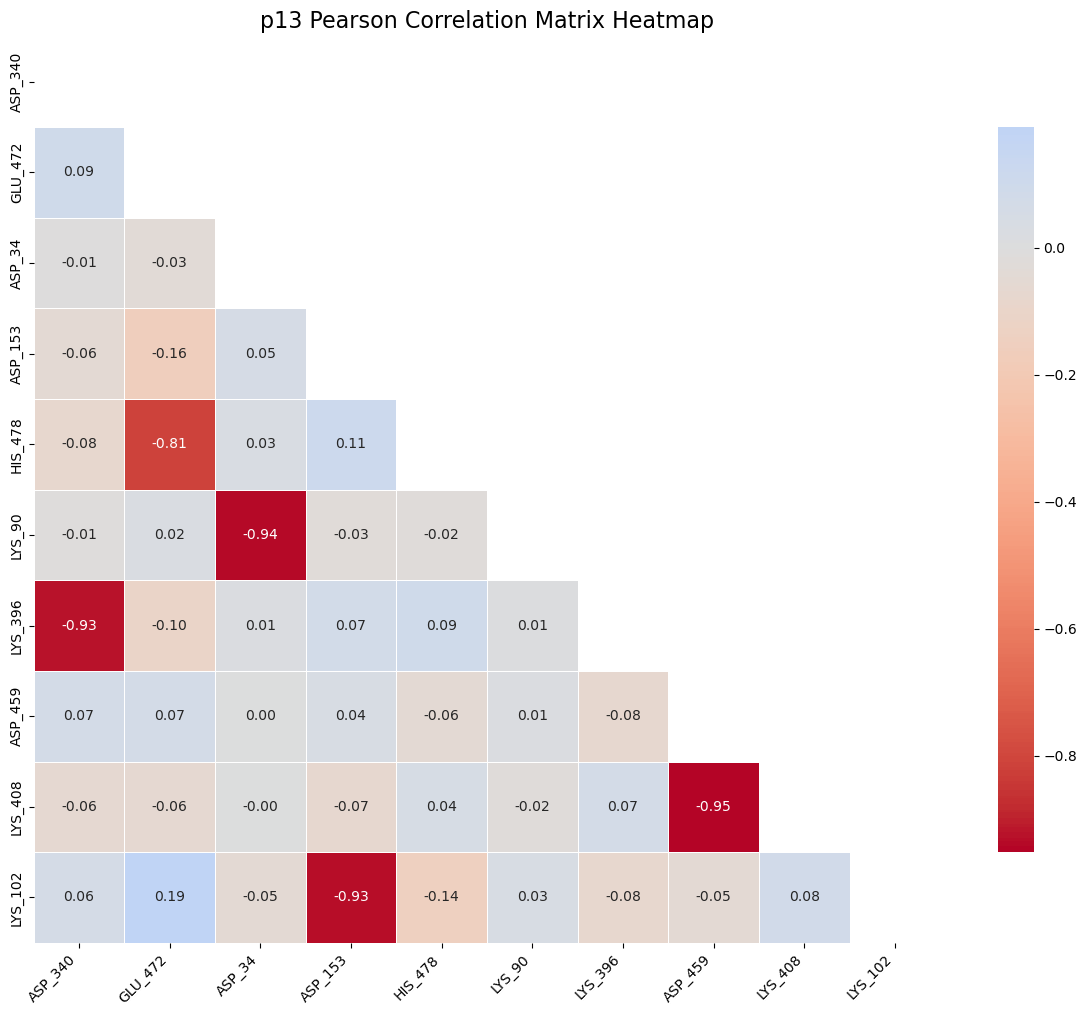

In [24]:
visualize_matrix('p13', p13_hc_matrix)

In [10]:
S02_corr_features.to_csv('./processed/correlation/S02_filtered_data.csv', index=False)
S03_corr_features.to_csv('./processed/correlation/S03_filtered_data.csv', index=False)
S04_corr_features.to_csv('./processed/correlation/S04_filtered_data.csv', index=False)
S05_corr_features.to_csv('./processed/correlation/S05_filtered_data.csv', index=False)
S06_corr_features.to_csv('./processed/correlation/S06_filtered_data.csv', index=False)
S07_corr_features.to_csv('./processed/correlation/S07_filtered_data.csv', index=False)
S08_corr_features.to_csv('./processed/correlation/S08_filtered_data.csv', index=False)
S09_corr_features.to_csv('./processed/correlation/S09_filtered_data.csv', index=False)
S10_corr_features.to_csv('./processed/correlation/S10_filtered_data.csv', index=False)
S11_corr_features.to_csv('./processed/correlation/S11_filtered_data.csv', index=False)
p12_corr_features.to_csv('./processed/correlation/p12_filtered_data.csv', index=False)
p13_corr_features.to_csv('./processed/correlation/p13_filtered_data.csv', index=False)